In [4]:
from MoonBoardRNN.BetaMove.BetaMove import route_to_x_vectors
from MoonBoardRNN.GradeNet.grade_net import GradeNet
from MoonBoardRNN.BetaMove.BetaMove import classify_and_reorganize_data_ga
from MoonBoardRNN.BetaMove.BetaMove import x_vectors_to_matrix
from MoonBoardRNN.BetaMove.BetaMove import produce_sequence

In [5]:
from share.moonboard_route import MoonBoardRoute
from MapElites.me_utils import *

rand_route = MoonBoardRoute.make_random_valid()
params = route_to_ME_params(rand_route)
deparasm = ME_params_to_route(params)
print(rand_route)
print(params)
print(deparasm)

MoonBoardRoute(mid_holds=[MoonBoardHold(row=11, col=10), MoonBoardHold(row=13, col=5), MoonBoardHold(row=5, col=4)], start_holds=[MoonBoardHold(row=5, col=3)], end_holds=[MoonBoardHold(row=17, col=6)], id=UUID('29d4532f-546f-11ed-8826-b13708a5728f'))
[58, 193, 3, 131, 148, 59, -1, -1, -1, -1]
MoonBoardRoute(mid_holds=[MoonBoardHold(row=11, col=10), MoonBoardHold(row=13, col=5), MoonBoardHold(row=5, col=4)], start_holds=MoonBoardHold(row=5, col=3), end_holds=MoonBoardHold(row=17, col=6), id=UUID('29d45330-546f-11ed-8826-b13708a5728f'))


In [2]:
# make a route with a grade?
from share.moonboard_route import MoonBoardRoute
from MoonBoardRNN.GradeNet.grade_net import GradeNet
from MoonBoardRNN.plotting import plot_problem

TARGET = 'V4'
net = GradeNet()
while True:
    try:
        route = MoonBoardRoute.make_random_valid()
        grade = net.grade_route(route)
        if grade == TARGET:
            break
        else:
            print(f'Found route with grade {grade}')
    except Exception as ex:
        print(ex)
        pass

print(route.get_max_span(), route.get_hold_variety())
print(f'Grade: {grade}')
plot_problem(route.to_strings())

Found route with grade V9
Found route with grade V10
Found route with grade V8
Found route with grade V8
Found route with grade V9
Found route with grade V8
Found route with grade V10
Found route with grade V9
Found route with grade V10
Found route with grade V8
Found route with grade V10
Found route with grade V9
Found route with grade V6
Found route with grade V10
Found route with grade V6
Found route with grade V6
Found route with grade V8
Found route with grade V6
Found route with grade V9
Found route with grade V8
Found route with grade V9
Found route with grade V6
Found route with grade V6
Found route with grade V8
Found route with grade V6
Found route with grade V8
Found route with grade V10
Found route with grade V8
Found route with grade V7
Found route with grade V8
Found route with grade V8
Found route with grade V9
Found route with grade V6
Found route with grade V8
Found route with grade V10
Found route with grade V9
Found route with grade V8
Found route with grade V8
Found

KeyError: MoonBoardHold(row=12, col=5)

2023-01-08 18:11:44.881426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-08 18:11:44.990395: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-08 18:11:44.990414: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-08 18:11:45.014365: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-08 18:11:45.656411: W tensorflow/stream_executor/platform/de

2023-01-08 18:11:46.504476: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 18:11:46.504672: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-08 18:11:46.504726: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-08 18:11:46.504777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-08 18:11:46.504826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

V4
28.393716294278914


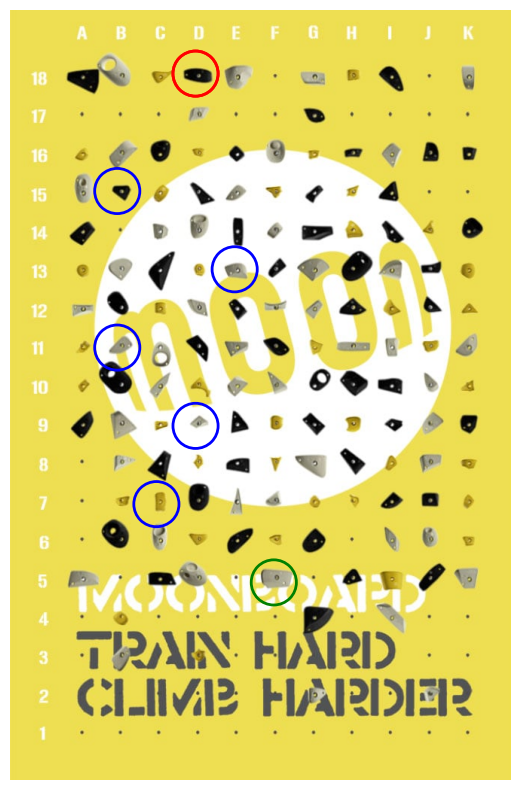

In [1]:
# Test Route - PULL YASELF UP! YAY

from share.moonboard_route import MoonBoardRoute
from MoonBoardRNN.GradeNet.grade_net import GradeNet
from MoonBoardRNN.plotting import plot_route

start_holds = ['F5']
end_holds = ['D18']
others = ['C7', 'D9', 'B11', 'E13', 'B15', 'D18']
route = MoonBoardRoute.from_hold_strings(start_holds=start_holds, mid_holds=others, end_holds=end_holds)
# x_vecs = route_to_x_vectors(route)
# matrix = x_vectors_to_matrix(x_vecs)

print('')
# x_vectors = route_to_x_vectors(route)
net = GradeNet()
grade = net.grade_route(route)
print(grade)
print(route.get_max_span())
plot_route(route)
#print(x_vectors)



In [1]:
from util import load_pickle
from share.moonboard_route import MoonBoardRoute
from MapElites.me_utils import ME_params_to_route
from MoonBoardRNN.plotting import plot_route
archive_path = '/home/daniel/GeneticBoulders/results/1666711238.824114/archive.p'
archive = load_pickle(archive_path)
for e in archive:
    route = ME_params_to_route(list(e.sol))
    plot_route(route)



FileNotFoundError: [Errno 2] No such file or directory: '/home/daniel/GeneticBoulders/results/1666711238.824114/archive.p'

In [6]:
from util import load_pickle

path = '/home/daniel/GeneticBoulders/results/big_run/aggregate.p'
agg = load_pickle(path)
agg.plot_qd_score('home/daniel/GeneticBoulders/results/big_run/qd_score.png')
agg.plot_max_fitness('home/daniel/GeneticBoulders/results/big_run/qd_score.png')
print('')

AttributeError: Can't get attribute 'ExperimentAggregator' on <module 'MapElites.tracking' from '/home/daniel/GeneticBoulders/MapElites/tracking.py'>

In [1]:
from share.moonboard_util import *
for h in ALL_HOLDS:
    for j in ALL_HOLDS:
        print(DIST_GRAPH[h][j] == DIST_GRAPH[j][h])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
